In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, sobel
from skimage import io, color
from skimage.segmentation import watershed
from skimage.feature import canny
from scipy import ndimage as ndi

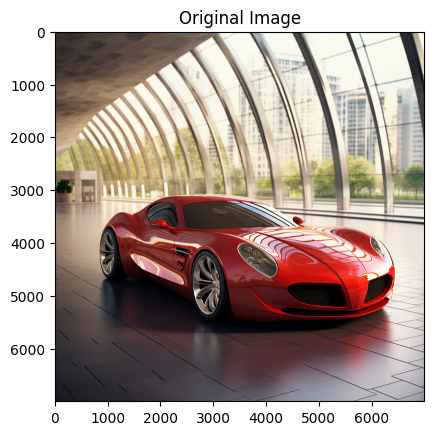

Image Size: 7000x7000, Channels: 3
Total Pixels: 49000000


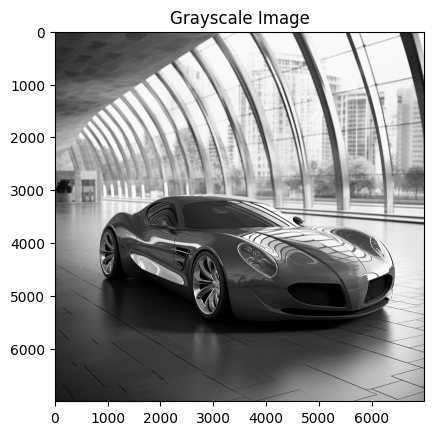

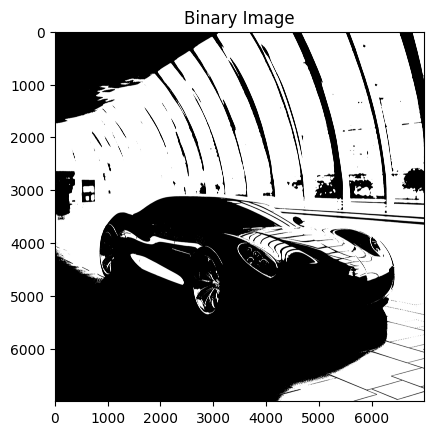

Black Pixel Area: 24329523


In [9]:



image = cv2.imread("/content/img.jpg")


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()


height, width, channels = image.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")


total_pixels = height * width
print(f"Total Pixels: {total_pixels}")


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.show()


_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.show()


black_pixels = np.sum(binary_image == 0)
print(f"Black Pixel Area: {black_pixels}")

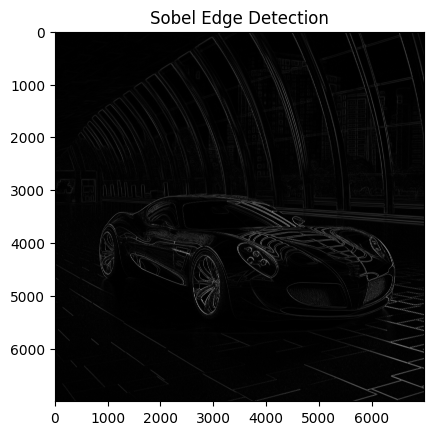

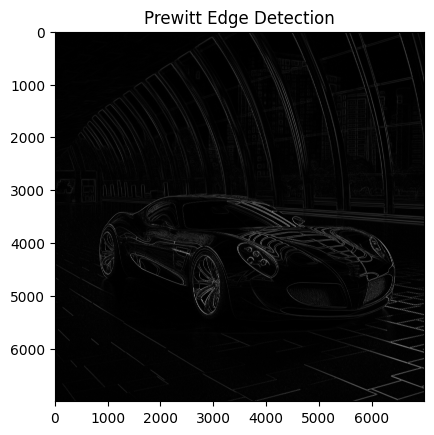

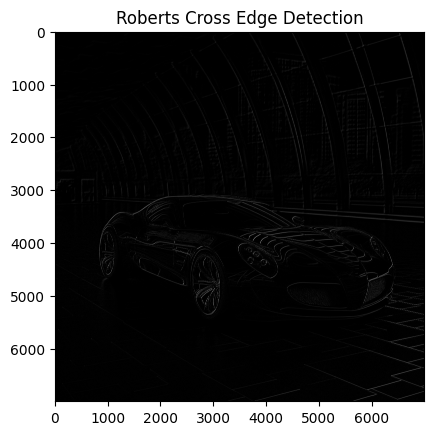

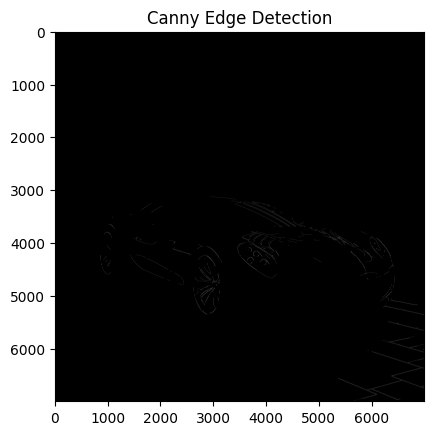

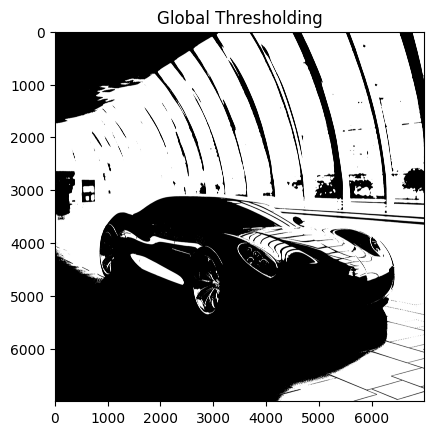

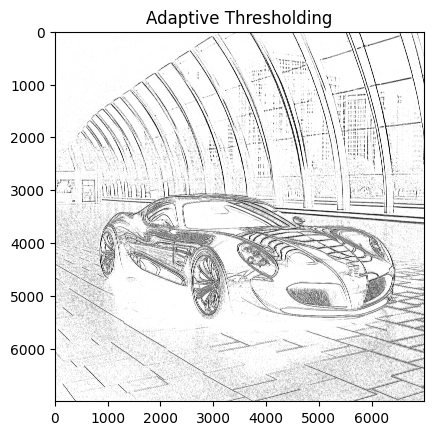

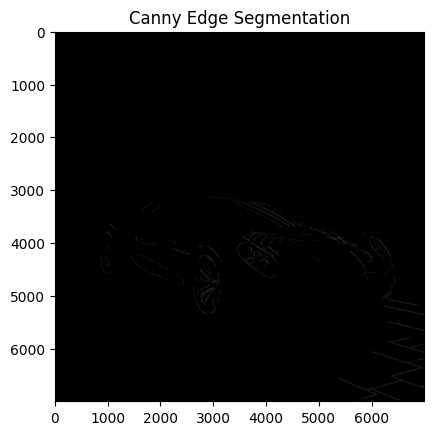

In [ ]:


sobel_edges = sobel(gray_image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.show()

prewitt_edges = prewitt(gray_image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.show()


roberts_edges = cv2.filter2D(gray_image, -1, np.array([[1, 0], [0, -1]]))
plt.imshow(roberts_edges, cmap='gray')
plt.title("Roberts Cross Edge Detection")
plt.show()


canny_edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()


_, global_thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.show()


adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.show()


plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Segmentation")
plt.show()


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.show()
